In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# this cell runs this pipeline and saves the data for all chr.
# for individual analysis, see each cells below 
# note = individual cell may not be updated (refer back to this cell for updated code)
def extract_value_pattern_temporal_pattern(file_path):
    for chr_folder_name in os.listdir(file_path):
        chr_path = os.path.join(file_path, chr_folder_name)
        if not os.path.isdir(chr_path) or not chr_folder_name.startswith('chr'):
            continue
        #Load Data 
        agreement_df = pd.read_csv(f"{file_path}{chr_folder_name}/{chr_folder_name}_temporal_trend_categories.csv")
        temporal_df = pd.read_csv(f"{file_path}{chr_folder_name}/{chr_folder_name}_temporal_value_patterns.csv")
        #Merge on gene_name
        merged_df = pd.merge(agreement_df, temporal_df, on="gene_name")
        #  Create Crosstab 
        crosstab = pd.crosstab(merged_df["combined_pattern"], merged_df["agreement_class"])
        merged_df["combined_label"] = merged_df["combined_pattern"] + " | " + merged_df["agreement_class"]
        merged_df.to_csv(f"{file_path}{chr_folder_name}/{chr_folder_name}_temporal_trendCategories_valuePattern.csv", index=False)
        print(f"{chr_folder_name} data saved")

    

file_path = "data/green_monkey/all_structure_files/"
extract_value_pattern_temporal_pattern(file_path)

chr23 data saved
chr12 data saved
chr15 data saved
chr14 data saved
chr13 data saved
chr25 data saved
chr22 data saved
chr4 data saved
chr3 data saved
chr2 data saved
chr5 data saved
chr18 data saved
chr27 data saved
chr20 data saved
chr29 data saved
chr16 data saved
chr10 data saved
chr28 data saved
chr21 data saved
chr19 data saved
chr26 data saved
chr7 data saved
chr6 data saved
chr1 data saved


In [3]:
#Load Data 
agreement_df = pd.read_csv("data/green_monkey/all_structure_files/chr1/chr1_temporal_trend_categories.csv")
temporal_df = pd.read_csv("data/green_monkey/all_structure_files/chr1/chr1_temporal_value_patterns.csv")


In [4]:
#Merge on gene_name
merged_df = pd.merge(agreement_df, temporal_df, on="gene_name")


In [5]:
#  Create Crosstab 
crosstab = pd.crosstab(merged_df["combined_pattern"], merged_df["agreement_class"])

#Display Crosstab Table
print("\n=== Temporal Shape Pattern vs Feature Agreement Encoding ===")
crosstab




=== Temporal Shape Pattern vs Feature Agreement Encoding ===


agreement_class,accessibility_only,conflict,expr_acc_down,expr_acc_up,expression_only,mixed,stable
combined_pattern,,,,,,,
brief dip & brief spike,3,5,0,0,2,9,1
flat & gradual down,241,87,15,7,51,227,79
noise,16,13,1,1,5,36,3


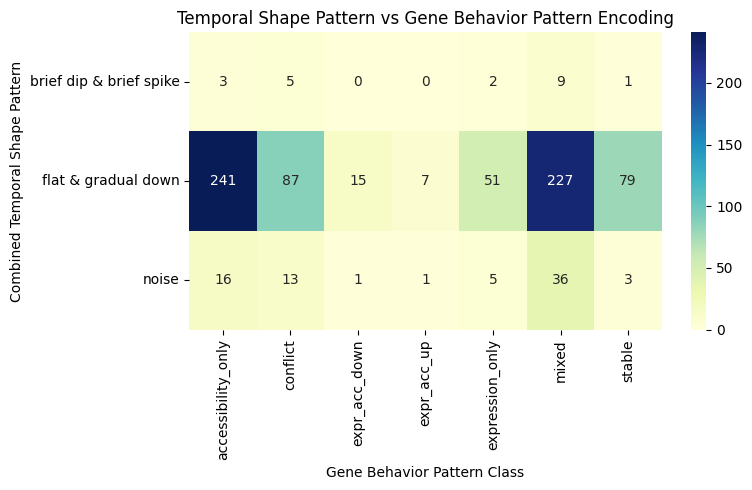

In [16]:
# Plot Heatmap 
plt.figure(figsize=(8, 5))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Temporal Shape Pattern vs Gene Behavior Pattern Encoding")
plt.xlabel("Gene Behavior Pattern Class")
plt.ylabel("Combined Temporal Shape Pattern")
plt.tight_layout()
plt.show()

In [7]:
# Most frequent temporal patterns
print(merged_df["combined_pattern"].value_counts().head(10))

# Most frequent agreement classes within a specific temporal pattern
merged_df[merged_df["combined_pattern"] == "gradual up & gradual up"]["agreement_class"].value_counts()


combined_pattern
flat & gradual down        707
noise                       75
brief dip & brief spike     20
Name: count, dtype: int64


Series([], Name: count, dtype: int64)

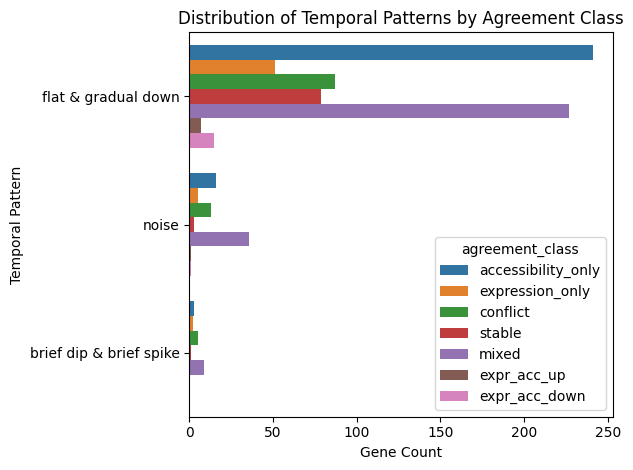

In [8]:
sns.countplot(data=merged_df, y="combined_pattern", hue="agreement_class", order=merged_df["combined_pattern"].value_counts().index)
plt.title("Distribution of Temporal Patterns by Agreement Class")
plt.xlabel("Gene Count")
plt.ylabel("Temporal Pattern")
plt.tight_layout()
plt.show()


In [9]:
merged_df["combined_label"] = merged_df["combined_pattern"] + " | " + merged_df["agreement_class"]
label_counts = merged_df["combined_label"].value_counts()
print(label_counts.head(10))


combined_label
flat & gradual down | accessibility_only    241
flat & gradual down | mixed                 227
flat & gradual down | conflict               87
flat & gradual down | stable                 79
flat & gradual down | expression_only        51
noise | mixed                                36
noise | accessibility_only                   16
flat & gradual down | expr_acc_down          15
noise | conflict                             13
brief dip & brief spike | mixed               9
Name: count, dtype: int64


- The most common gene response pattern is a flat expression profile combined with gradually decreasing accessibility, indicating that many genes undergo chromatin closing without corresponding gene expression changes.

- A large number of genes fall into the “accessibility_only” and “mixed” agreement classes, suggesting that accessibility changes are often not accompanied by consistent expression shifts.

- Coordinated up or down regulation of both expression and accessibility is rare, implying that linear gene activation or silencing is not the dominant for chr 1.

- Many genes exhibit conflicting or mixed expression-accessibility directions across timepoints

- The presence of an “expression_only” category, though smaller, highlights cases where gene expression changes occur without detectable chromatin remodeling.

- Overall, the system appears to favor epigenetic silencing through accessibility loss, with expression changes  being regulated independently in many genes.


In [10]:
interesting = merged_df[
    (merged_df["combined_pattern"].str.contains("brief|complex")) &
    (merged_df["agreement_class"] == "conflict")
]
interesting

,gene_name,log2FC_12h,log2FC_18h,log2FC_24h,acc_untr_12h_tss,acc_untr_12h_avg,acc_vacv_12h_tss,acc_vacv_12h_avg,acc_untr_18h_tss,acc_untr_18h_avg,...,expr_down_acc_up,agreement_class,tsne_1,tsne_2,tsne_expr_1,tsne_expr_2,expression_pattern,accessibility_pattern,combined_pattern,combined_label
134,LOC103222589,0.087513,0.595877,3.288367,7.69873,7.057177,7.41512,6.336552,5.13529,8.986778,...,0,conflict,43.623722,13.527258,43.623722,13.527258,gradual up,gradual down,brief dip & brief spike,brief dip & brief spike | conflict
221,LOC103233298,0.815376,0.049220,2.502847,5.29288,6.392706,3.37051,7.714710,2.71868,5.717864,...,0,conflict,41.372963,10.045959,41.372963,10.045959,gradual up,gradual down,brief dip & brief spike,brief dip & brief spike | conflict
512,LOC103241038,0.030651,0.736788,2.285222,9.62341,9.623410,5.39281,5.392810,10.27060,10.270600,...,0,conflict,39.092342,12.420297,39.092342,12.420297,gradual up,gradual down,brief dip & brief spike,brief dip & brief spike | conflict
516,DCHS1,0.683055,-0.798412,3.404561,2.88702,5.954489,12.80790,7.190407,3.32283,5.190205,...,1,conflict,43.927456,10.887635,43.927456,10.887635,gradual up,gradual down,brief dip & brief spike,brief dip & brief spike | conflict
641,LOC103248252,1.343233,-0.669385,3.404564,6.73639,10.051124,4.04461,12.807927,5.13529,8.911228,...,1,conflict,43.820553,10.135971,43.820553,10.135971,noise,gradual down,brief dip & brief spike,brief dip & brief spike | conflict


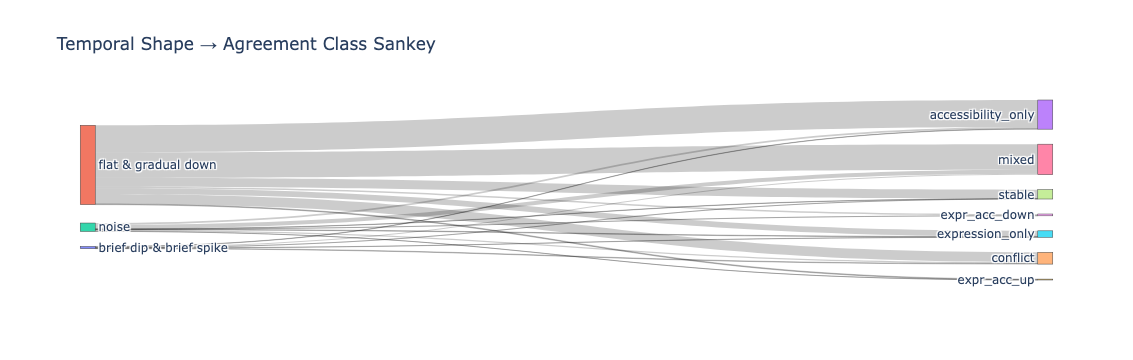

In [11]:
from collections import defaultdict
import plotly.graph_objects as go

# Count transitions
sankey_data = merged_df.groupby(["combined_pattern", "agreement_class"]).size().reset_index(name="count")

# Build node list
all_patterns = sankey_data["combined_pattern"].unique().tolist()
all_classes = sankey_data["agreement_class"].unique().tolist()
nodes = all_patterns + all_classes

# Indices for Sankey
pattern_idx = {k: i for i, k in enumerate(all_patterns)}
class_idx = {k: i + len(all_patterns) for i, k in enumerate(all_classes)}

# Build link data
source = sankey_data["combined_pattern"].map(pattern_idx)
target = sankey_data["agreement_class"].map(class_idx)
value = sankey_data["count"]

# Plot
fig = go.Figure(data=[go.Sankey(
    node=dict(label=nodes, pad=15, thickness=15),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(title_text="Temporal Shape → Agreement Class Sankey", font_size=12)
fig.show()


In [12]:
merged_df.to_csv("data/green_monkey/all_structure_files/chr1/chr1_temporal_trend_shapePattern_classPattern.csv", index=False)